<a href="https://colab.research.google.com/github/slapazromero/Wine_RN/blob/main/Ejercicios_RN_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import ConfusionMatrixDisplay
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import tensorflow as tf
from keras.utils import to_categorical

# Preproceso.

## Importacion de los datos del dataset.

In [ ]:
wine = pd.read_csv('WineQT.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


## Modificaciones de los datos.

In [ ]:
wine = wine.drop('Id', axis=1)

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

<Axes: >

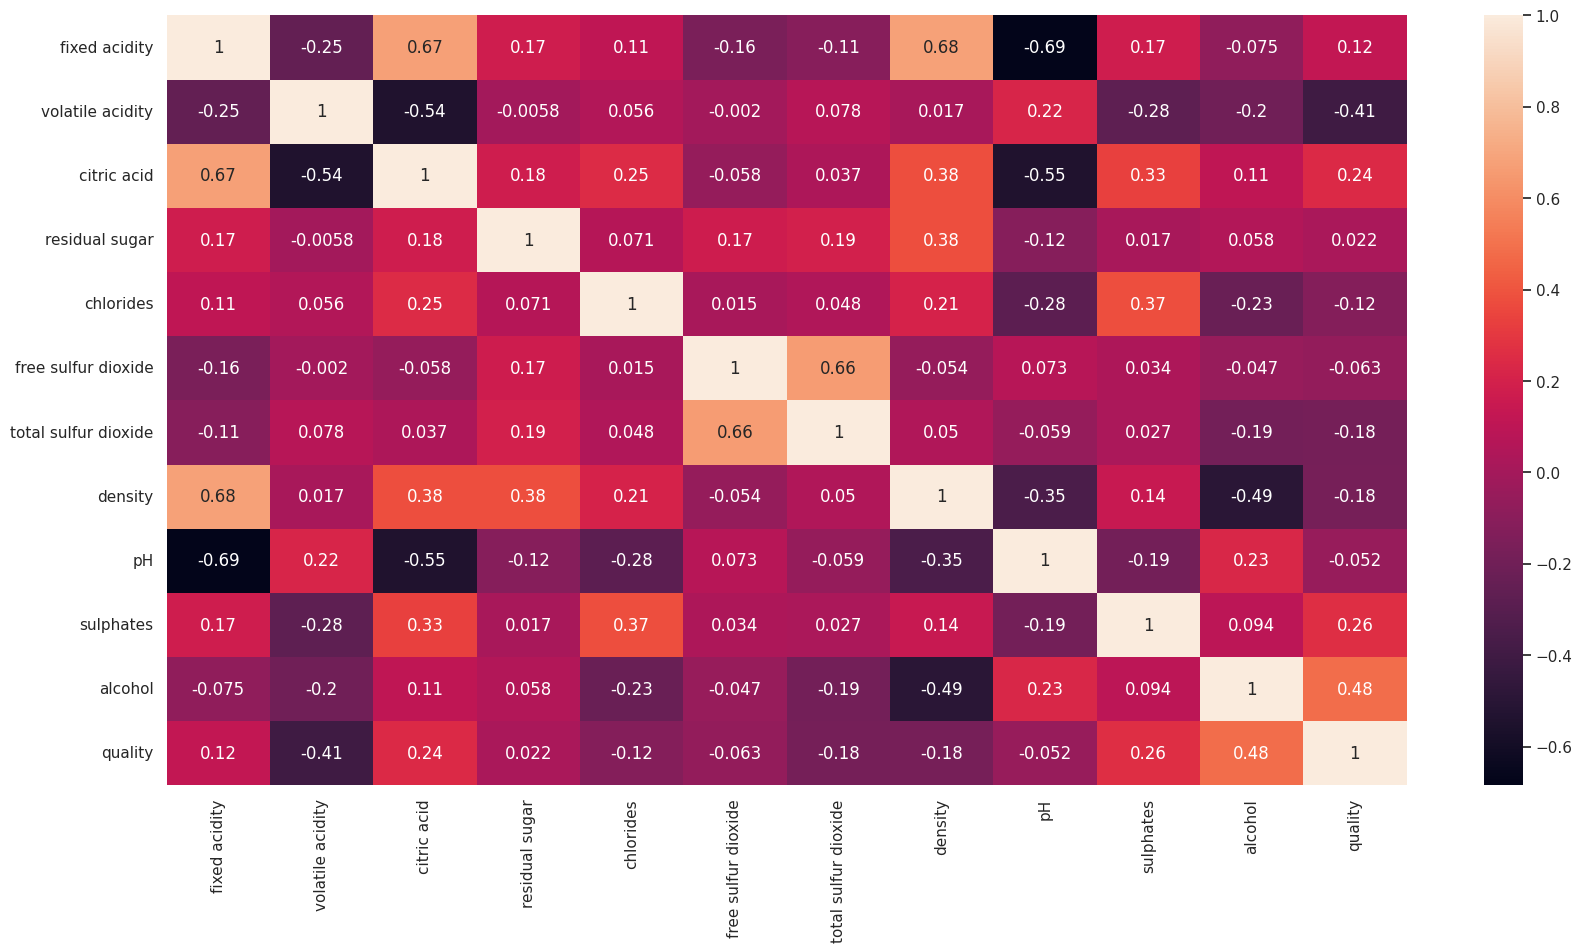

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(wine.corr(), annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [ ]:
caracteristicas = ['volatile acidity', 'alcohol', 'sulphates']
#caracteristicas = wine.drop('quality', axis=1).columns.to_list()
resultado = ['quality']

## Separar datos entre datos de entrada y etiquetas (resultados).



In [ ]:
x_wine = wine[caracteristicas]
y_wine = wine[resultado]

## Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.20)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape

(914, 9)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [ ]:
model = tf.keras.models.Sequential()

input_shape = (len(x_train.columns),)

init = tf.keras.initializers.TruncatedNormal(stddev = 0.01, seed = 1)

model.add(
    tf.keras.layers.Dense(
      int(len(x_train.columns) * 4),
      activation='relu',
      input_shape = input_shape,
      kernel_initializer='he_uniform'
    )
)

model.add(
    tf.keras.layers.Dense(
        int(len(y_train[0])),
        activation = 'softmax',
        kernel_initializer = init
    )
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


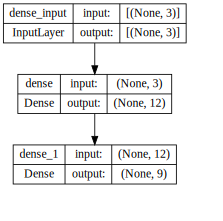

In [ ]:
SVG(model_to_dot(
    model, show_shapes= True, 
    show_layer_names=True, 
    dpi=85).create(prog='dot', format='svg'))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Realizar una predicción con los datos de prueba.

In [ ]:
batch_size = int(math.sqrt(len(x_train)))

early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=64, mode='max', verbose=0)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.75, patience=32, mode='max', verbose=0)

In [ ]:
history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = 1000,
          callbacks = [early_stop, reduce_lr],
          use_multiprocessing = True,
          validation_data = (x_test, y_test))

Epoch 1/1000
31/31 [==============================] - 4s 38ms/step - loss: 1.3596 - accuracy: 0.3862 - val_loss: 1.1809 - val_accuracy: 0.4323 - lr: 0.0100
Epoch 2/1000
31/31 [==============================] - 0s 3ms/step - loss: 1.2337 - accuracy: 0.4322 - val_loss: 1.1599 - val_accuracy: 0.4148 - lr: 0.0100
Epoch 3/1000
31/31 [==============================] - 0s 3ms/step - loss: 1.2269 - accuracy: 0.4289 - val_loss: 1.1552 - val_accuracy: 0.5240 - lr: 0.0100
Epoch 4/1000
31/31 [==============================] - 0s 4ms/step - loss: 1.2113 - accuracy: 0.4442 - val_loss: 1.1324 - val_accuracy: 0.4454 - lr: 0.0100
Epoch 5/1000
31/31 [==============================] - 0s 3ms/step - loss: 1.1882 - accuracy: 0.4705 - val_loss: 1.1191 - val_accuracy: 0.5546 - lr: 0.0100
Epoch 6/1000
31/31 [==============================] - 0s 4ms/step - loss: 1.1794 - accuracy: 0.4672 - val_loss: 1.0925 - val_accuracy: 0.5459 - lr: 0.0100
Epoch 7/1000
31/31 [==============================] - 0s 3ms/step - l

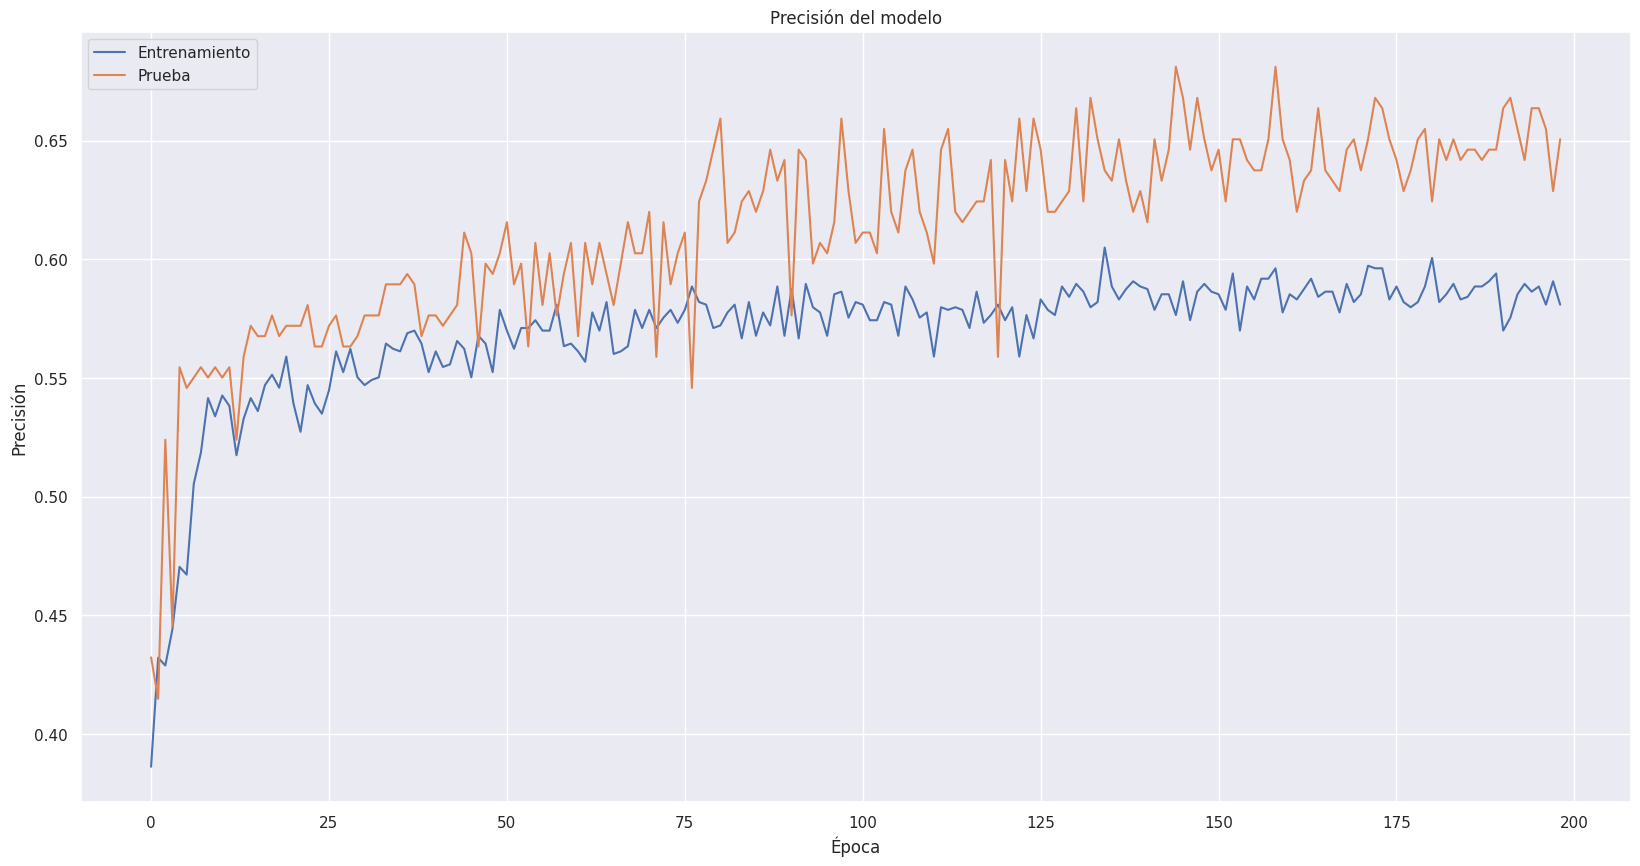

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

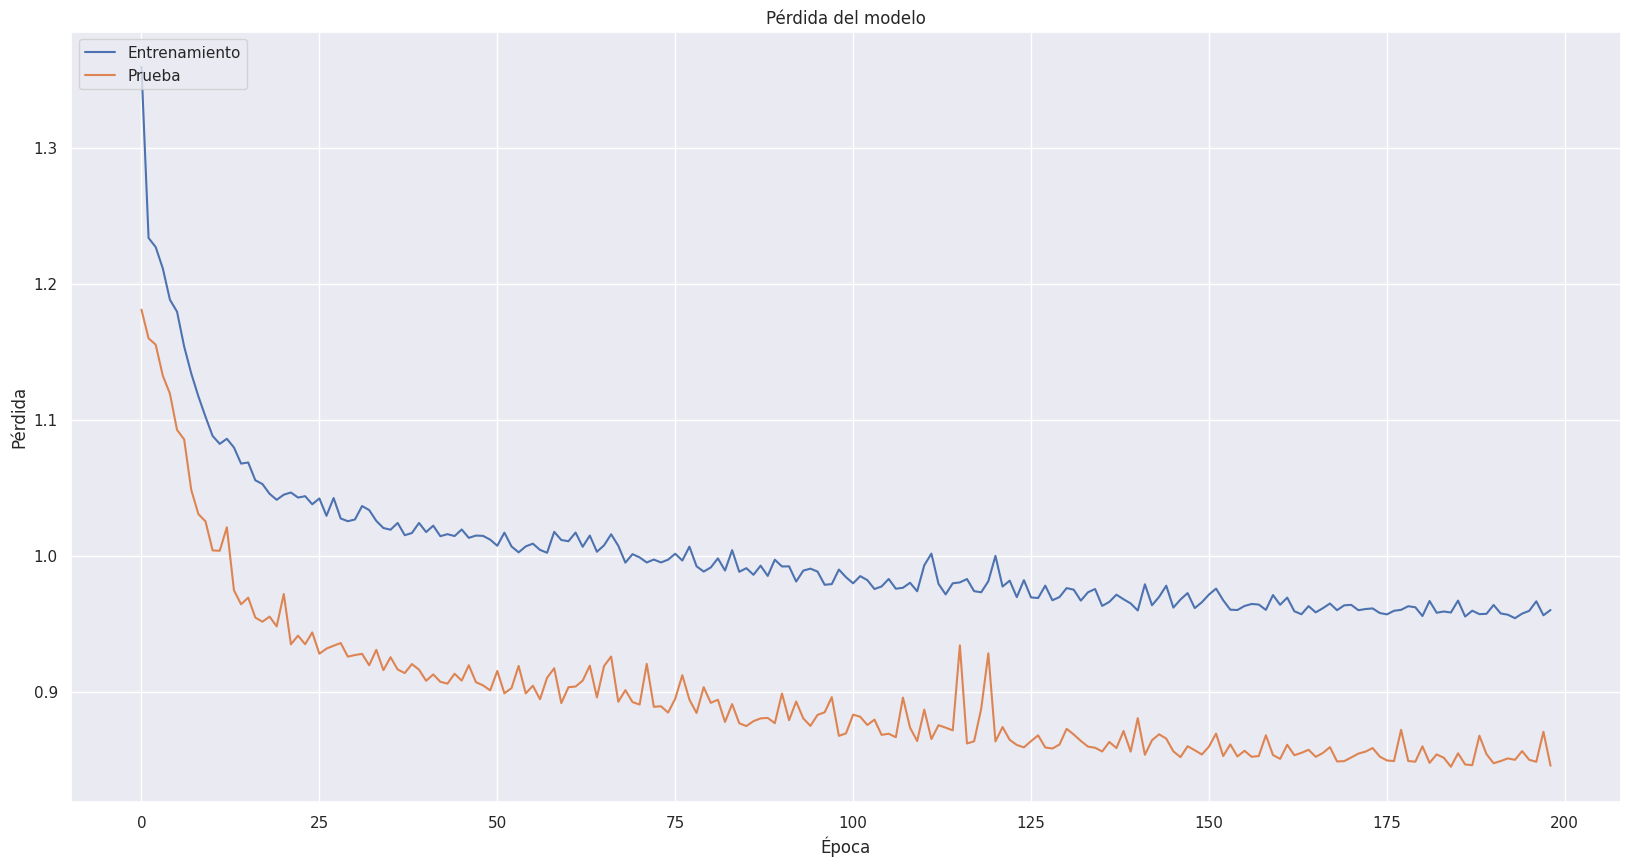

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

# Evaluación.

##  Mostrar los valores de bondad del modelo.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

8/8 [==============================] - 0s 3ms/step - loss: 1.1023 - accuracy: 0.6114
Test loss: 1.1022822856903076
Test accuracy: 0.6113536953926086


## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [ ]:
predictions = model.predict(x_test)

y_pred = predictions.argmax(axis=1)

8/8 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 7, 5, 7, 6, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 8, 6, 6, 7, 5, 5, 6, 6, 7, 7, 5, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 7, 6, 7, 6, 5, 6, 5, 7, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6,
       7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5,
       6, 7, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 6,
       7, 5, 5, 6, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 7, 6, 5, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 7, 5, 5,
       5, 6, 5, 6, 5, 6, 6, 6, 6])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

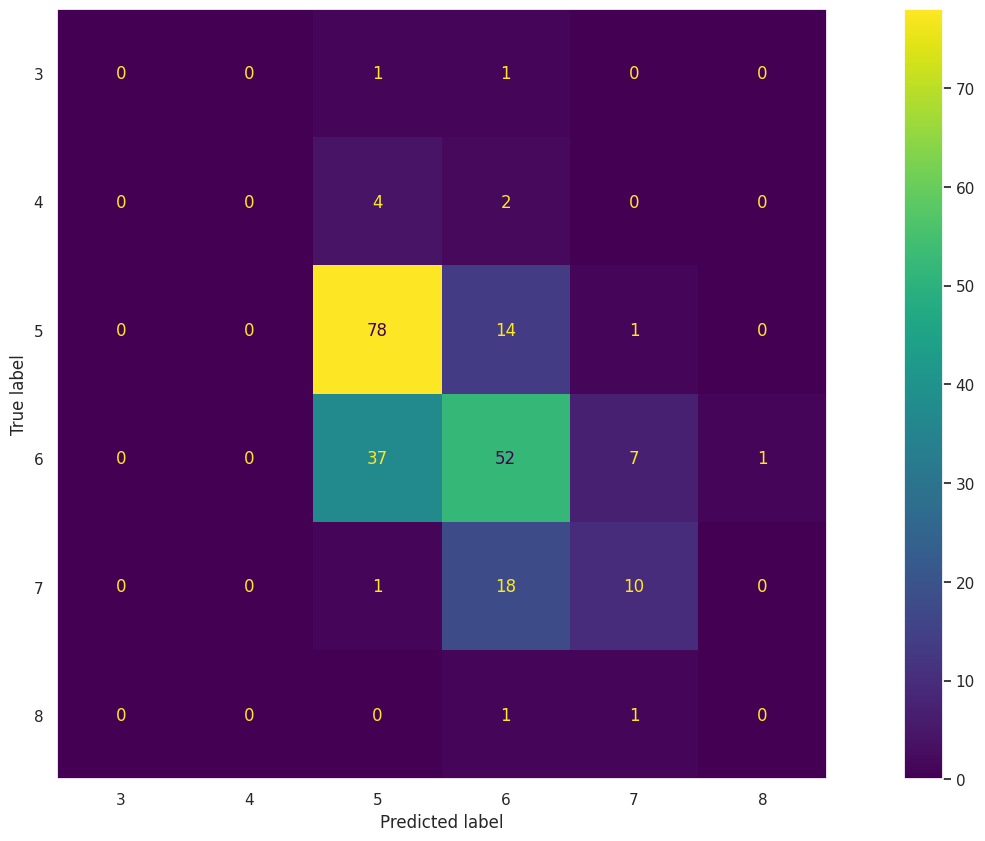

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis = 1), y_pred)
plt.grid(visible=None)